In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model

In [5]:
df_train = pd.read_csv('homeprices.csv')
df_train

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


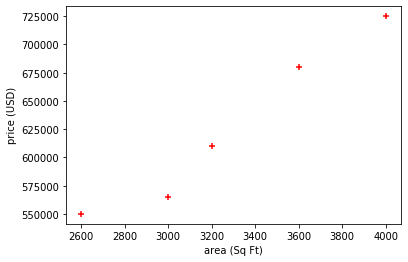

In [6]:
%matplotlib inline
plt.xlabel('area (Sq Ft)')
plt.ylabel('price (USD)')
plt.scatter(df_train.area,df_train.price,color='red',marker='+')

In [7]:
reg = linear_model.LinearRegression()
reg.fit(df_train[['area']],df_train.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
reg.predict([[3300]])

array([628715.75342466])

In [9]:
reg.coef_

array([135.78767123])

In [10]:
reg.intercept_

180616.43835616432

In [13]:
df_test = pd.read_csv('areas.csv')
df_test

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [14]:
predicted = reg.predict(df_test)

In [15]:
df_test['prices'] = predicted

In [29]:
df_test

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [21]:
df_test.to_csv("predicted.csv",index=False)

In [20]:
import pickle as pick

In [21]:
with open('model_linear_saved','wb') as f:
    pick.dump(reg,f)    

In [22]:
with open('model_linear_saved','rb') as f:
    mp = pick.load(f)

In [23]:
mp.predict([[3300]])

array([628715.75342466])

In [1]:
from joblib import dump, load

In [17]:
dump(reg, 'model_linear_saved.joblib') 

['model_linear_saved.joblib']

In [18]:
mj = load('model_linear_saved.joblib') 

In [19]:
mj.predict([[3300]])

array([628715.75342466])